In [1]:
# Import libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
# Memanggil dataset
data = pd.read_csv("Sales_Data.csv", sep=';')
data

,BiayaPromo,NilaiPenjualan
0,1500,90500
1,1800,89500
2,1900,105000
3,2050,102000
4,2050,90500
5,2100,104500
6,2200,109500
7,2400,150000
8,3050,152000
9,3200,173000


In [4]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values


In [5]:
#Melihat variable keys dalam dataset
data.keys()

Index(['BiayaPromo', 'NilaiPenjualan'], dtype='object')

In [6]:
data.shape

(20, 2)

In [8]:
# Split Validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
#Fitting Simple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [10]:
#Melakukan prediksi untuk hasil test
y_pred = regressor.predict(x_test)

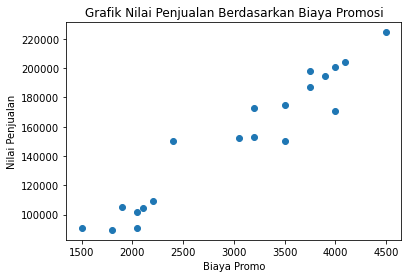

In [11]:
#Visualisasi Data 
plt.scatter(data['BiayaPromo'],data['NilaiPenjualan'])
plt.xlabel("Biaya Promo")
plt.ylabel("Nilai Penjualan")
plt.title("Grafik Nilai Penjualan Berdasarkan Biaya Promosi")
plt.show()

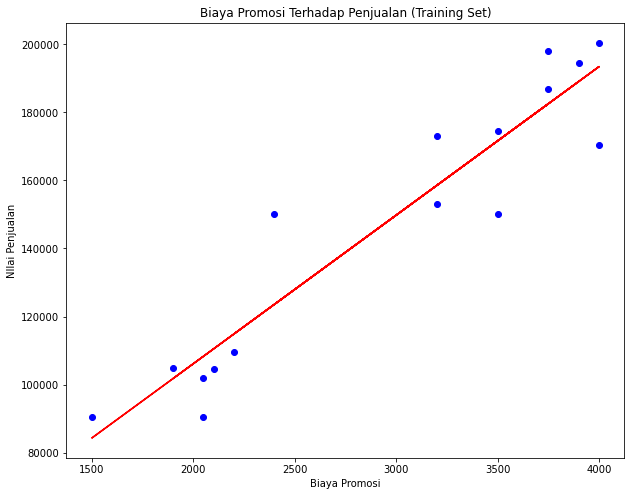

In [13]:
# Visualisasi Hasil Machine Learning

#ukuran plotnya
plt.figure(figsize=(10,8))

#Titik biru adalah data observasi
plt.scatter(x_train, y_train, color ='blue')

#Garis Merah adalah hasil prediksi dari machine learning
plt.plot(x_train, regressor.predict(x_train), color='red')

#Memberi judul dan label
plt.xlabel("Biaya Promosi")
plt.ylabel("NIlai Penjualan")
plt.title("Biaya Promosi Terhadap Penjualan (Training Set)")

#Menampilkan plot
plt.show()

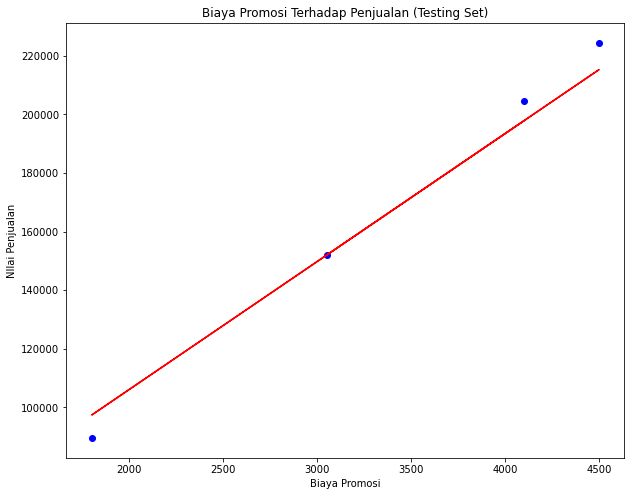

In [14]:
# Visualisasi hasil prediksi pada TEST-SET

#ukuran plotnya
plt.figure(figsize=(10,8))

#Titik biru adalah data observasi
plt.scatter(x_test, y_test, color ='blue')

#Garis Merah adalah hasil prediksi dari machine learning
plt.plot(x_test, regressor.predict(x_test), color='red')

#Memberi judul dan label
plt.xlabel("Biaya Promosi")
plt.ylabel("NIlai Penjualan")
plt.title("Biaya Promosi Terhadap Penjualan (Testing Set)")

#Menampilkan plot
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
round(mean_squared_error(y_test, y_pred),2)

47677768.72

In [16]:
from sklearn.metrics import mean_absolute_error
round(mean_absolute_error(y_test, y_pred),2)

5935.34

In [17]:
print(regressor.intercept_)

18748.346345695143


In [18]:
print(regressor.coef_)

[43.68141401]


In [ ]:
# Persamaan Linear Regression
#y = mx + b
#nilai penjualan = 43.68141401 * biaya promosi + 18748.346345695143

In [19]:
def calc(slope, intercept, nilaipenjualan):
    return slope*nilaipenjualan+intercept

score = calc(regressor.coef_, regressor.intercept_, 250000)
print(score)

[10939101.84883973]


In [20]:
#Passing 250000
score = regressor.predict([[250000]])
print(score)

[10939101.84883973]


In [21]:
y_pred = regressor.predict(x_test)

In [22]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predict':y_pred.squeeze()})
print(df_preds)

   Actual        Predict
0  204500  197842.143787
1   89500   97374.891564
2  224500  215314.709391
3  152000  151976.659076


In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [24]:
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 5935.34
Mean Squared Error: 47677768.72
Root Mean Squared Error: 6904.91
